# Ridge, Lasso, Elastic Net regression models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
sns.set_context('notebook')
sns.set_style('ticks')
colours = ['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8C564B', '#E377C2','#7F7F7F', '#BCBD22', '#17BECF']
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours)
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [3]:
data = pd.read_csv('Data/train.csv', index_col='id')
data_test = pd.read_csv("Data/test.csv", index_col='id')
data.head(5)

,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
1,85,f,2,t,-37.81554,144.96526,Apartment,Private room,4,0.5,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,3.68
2,151,f,18,f,-37.91984,145.03395,Apartment,Entire home/apt,6,2.0,...,95.0,10.0,9.0,10.0,10.0,10.0,10.0,t,moderate,0.82
3,188,f,1,t,-37.64818,145.54512,Guesthouse,Entire home/apt,6,1.0,...,93.0,9.0,9.0,10.0,10.0,10.0,9.0,t,strict_14_with_grace_period,5.50
4,200,f,1,t,-37.80245,144.98457,Apartment,Entire home/apt,4,2.5,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,flexible,0.26
5,90,t,2,f,-37.81796,144.96541,Apartment,Entire home/apt,2,1.0,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,8.06


In [4]:
data_test.head()

,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
1,f,1,f,-37.83753,144.99377,Apartment,Entire home/apt,2,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,NaN
2,f,3,t,-37.78394,145.13532,Townhouse,Entire home/apt,8,2.5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,NaN
3,f,1,f,-37.85689,144.96972,Apartment,Entire home/apt,4,1.0,1,...,95.0,10.0,10.0,10.0,10.0,10.0,9.0,t,strict_14_with_grace_period,2.32
4,f,1,t,-37.85946,144.97905,Apartment,Entire home/apt,2,1.0,1,...,98.0,10.0,9.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,0.14
5,t,5,t,-37.78225,145.15505,House,Entire home/apt,8,2.0,4,...,88.0,8.0,8.0,10.0,10.0,9.0,8.0,t,strict_14_with_grace_period,0.86


## 1. Exploratory Data Analysis

After obtaining the information concerning the data training errors, the Exploratory Data Analysis was conducted again.
On the base of the Exploratory Data Analysis conducted after the entry errors drop the following conclusions could be added:

1. The extreme values for the prices set by non-superhosts became closer to the prices set by superhosts. The same could be noted for the prices set by the hosts without verified identity and the hosts with verified identity; prices set for some particular type of lodging. The entry errors affected entire home/ appartments' prices.
2. The standard deviations for the prices set by non-superhosts had decreased. The same could be noted for the prices set by hosts without verified identity; the prices set for some particular type of lodging; the prices for both instant bookable and non-instant bookable lodging; lodging with the flexible and strict 14 days cancellation policy.
3. The price distribution become clearly more close to lognormal. There is almost no big difference between the distributions of prices set by superhosts and non-superhosts.
4. The error entries drop didn't affect significantly continuous predictor variables distributions.

On the base of the Exploratory Data Analysis it can be additionally concluded:

for categorial variables
1. The superhosts' average price is a little bit higher compared to non-superhost; but as the quantity of non-superhosts' listings in the sample is about 3 times higher than the quantity of the superhosts' listings in the sample, it is not possible to expand this conclusion to the comparison of the superhosts' and non-superhosts' prices in general.
2. For the hosts whose identity is verified, average price is higher a little bit.
3. The average mean is the highest for the treehouse, and the lowest for the campsite.
4. As was expected, the highest average price is for the entire home of appartment, and the lowest price is for the shared room.
5. The instant bookable lodging has on average lower price, compared to the non-instant bookable lodging, but the 25th and 50th percent quantiles prices are higher.
6. Lodging with the superstrict cancellation policy has the highest average price, while lodging with flexible cancellation policy has the lowest average price. The lodging with the superstrict cancellation policy has no outliers in term of price.

for continuous variables
1. Most hosts have less than 20 listings, but relatively substantial part of hostes have more than 20 listings.
2. As was expected, the majority of lodging listings are placed on the similar geographical lattitude and longitude, although, there are exceptions.
3. Number of accomodates varies between approximately 1 and 7.
4. The number of bathrooms is 1 in most lodgings and 2 is another popular case.
5. In most lodging number of bedrooms is between 0 and 5.
6. The most frequent number of beds is 1, however, the beds number varies on average between 1 and 5, lower numbers' frequence of occurence is higher.
7. Security deposits in most cases don't exceed 1 000 units.

In [5]:
data = data.drop([84, 2160, 2452, 3820, 3945, 4046, 4224, 5726, 5919, 6047])

In [6]:
data.groupby('host_is_superhost')['price'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
host_is_superhost,,,,,,,,
f,5242.0,153.03,191.91,14.0,74.0,117.0,168.00,5000.0
t,1748.0,149.66,138.91,13.0,85.0,119.0,175.25,3400.0


In [7]:
data.groupby('host_identity_verified')['price'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
host_identity_verified,,,,,,,,
f,4496.0,150.42,172.49,13.0,75.0,119.0,169.0,5000.0
t,2494.0,155.38,193.10,21.0,75.0,112.0,175.0,4445.0


In [8]:
d = data.groupby('property_type')['price'].describe().round(2)
d.sort_values(by=['mean'], inplace=True, ascending=False)
d

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Treehouse,1.0,800.00,NaN,800.0,800.00,800.0,800.00,800.0
Nature lodge,1.0,451.00,NaN,451.0,451.00,451.0,451.00,451.0
Boat,2.0,279.00,240.42,109.0,194.00,279.0,364.00,449.0
Other,15.0,243.67,403.85,26.0,58.00,129.0,212.50,1650.0
Farm stay,16.0,224.62,180.32,55.0,110.50,166.0,262.75,699.0
Villa,71.0,219.80,350.87,36.0,61.50,90.0,243.50,2380.0
Cottage,52.0,206.19,93.23,36.0,148.00,190.0,251.75,564.0
Serviced apartment,130.0,204.85,148.76,30.0,126.00,167.5,200.00,799.0
House,1688.0,168.94,253.35,14.0,50.00,90.0,200.00,4445.0


In [9]:
t = data.groupby('room_type')['price'].describe().round(2)
t.sort_values(by=['mean'], inplace=True, ascending=False)
t

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,4680.0,189.79,201.58,18.0,109.0,145.0,199.0,5000.0
Private room,2219.0,77.05,85.24,13.0,47.0,63.0,80.0,2000.0
Shared room,91.0,50.89,67.68,14.0,26.0,36.0,45.0,540.0


In [10]:
data.groupby('instant_bookable')['price'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
instant_bookable,,,,,,,,
f,3636.0,157.66,212.62,13.0,74.0,111.0,171.0,5000.0
t,3354.0,146.26,136.18,14.0,80.0,119.0,169.0,3645.0


In [11]:
t = data.groupby('cancellation_policy')['price'].describe().round(2)
t.sort_values(by=['mean'], inplace=True, ascending=False)
t

,count,mean,std,min,25%,50%,75%,max
cancellation_policy,,,,,,,,
super_strict_60,6.0,205.67,69.10,105.0,159.25,250.0,250.0,250.0
strict_14_with_grace_period,2919.0,180.70,202.04,18.0,100.00,135.0,190.0,4445.0
moderate,1954.0,139.09,153.59,14.0,78.00,115.0,161.0,5000.0
flexible,2111.0,124.74,164.67,13.0,56.00,90.0,151.0,3645.0


In [12]:
stats = data.describe().round(1)
stats[['security_deposit','cleaning_fee','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
      'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']]

,security_deposit,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,5073.0,5599.0,5642.0,5634.0,5638.0,5631.0,5636.0,5632.0,5630.0,5764.0
mean,312.5,67.7,94.1,9.6,9.4,9.7,9.7,9.7,9.5,1.6
std,489.5,60.4,8.4,0.8,1.0,0.7,0.7,0.6,0.9,1.7
min,0.0,0.0,20.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
25%,0.0,28.0,92.0,9.0,9.0,10.0,10.0,10.0,9.0,0.3
50%,200.0,60.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0
75%,400.0,90.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2.4
max,6958.0,668.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,13.8


In [13]:
data.min()

price                                       13
host_is_superhost                            f
host_total_listings_count                    0
host_identity_verified                       f
latitude                              -38.2244
longitude                              144.533
property_type                       Aparthotel
room_type                      Entire home/apt
accommodates                                 1
bathrooms                                    0
bedrooms                                     0
beds                                         0
security_deposit                             0
cleaning_fee                                 0
extra_people                                 0
minimum_nights                               1
maximum_nights                               1
number_of_reviews                            0
review_scores_rating                        20
review_scores_accuracy                       2
review_scores_cleanliness                    2
review_scores

## 2. Visualization 

In [14]:
cat_predictors = ['host_is_superhost', 
                  'host_identity_verified',
                  'room_type',
                  'instant_bookable',
                  'cancellation_policy']

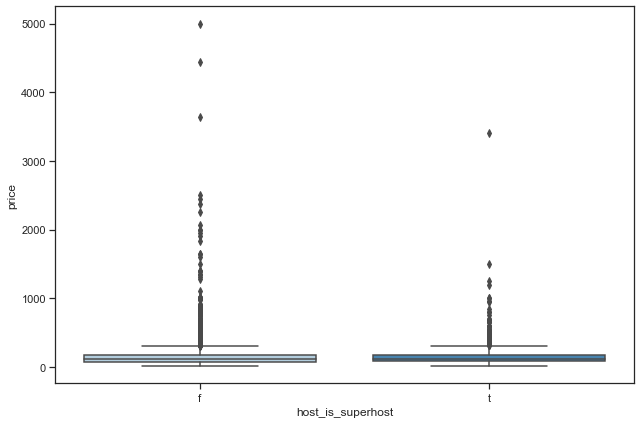

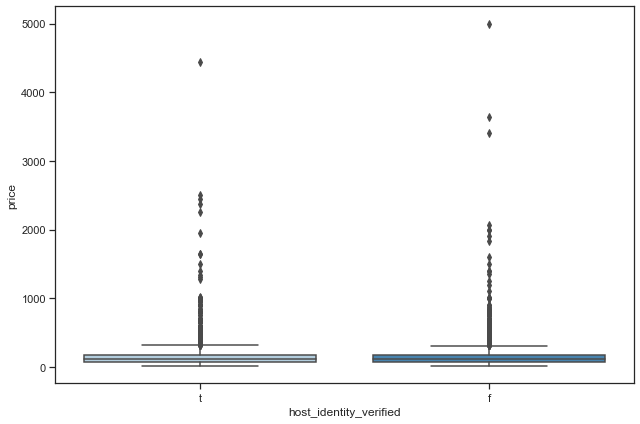

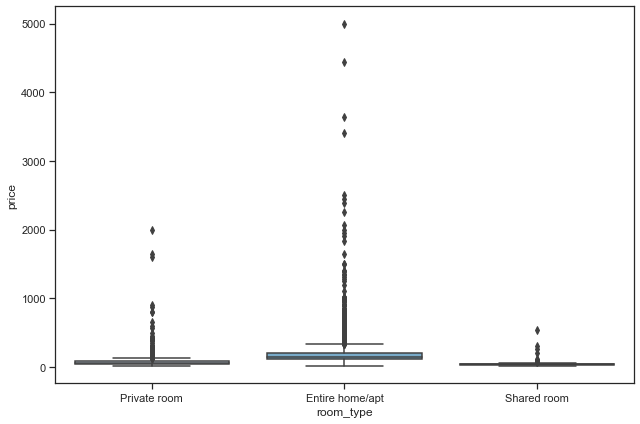

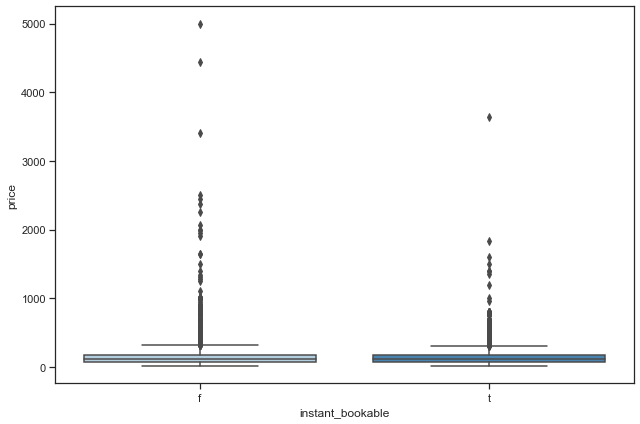

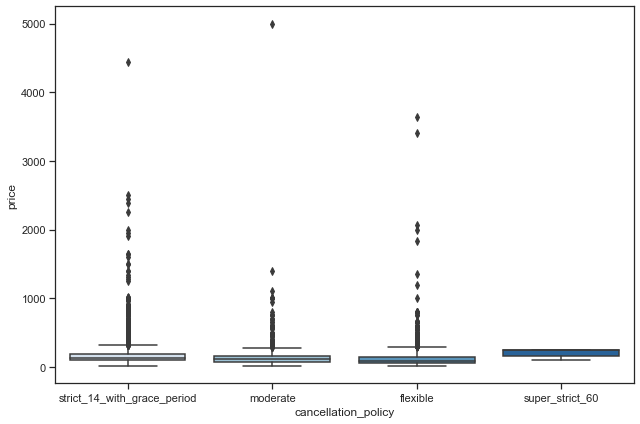

In [15]:
for x in cat_predictors:
    sns.boxplot(x=x, y='price', data=data, palette='Blues')
    plt.tight_layout()
    plt.show()

In [16]:
cont_predictors = ['host_total_listings_count', 
                   'latitude', 
                   'longitude', 
                   'accommodates',
                   'bathrooms',
                   'bedrooms',
                   'beds',
                   'security_deposit',
                   'cleaning_fee',
                   'extra_people',
                   'minimum_nights',
                   'maximum_nights',
                   'number_of_reviews',
                   'review_scores_rating',
                   'review_scores_accuracy',
                   'review_scores_cleanliness',
                   'review_scores_checkin',
                   'review_scores_communication',
                   'review_scores_location',
                   'review_scores_value',
                   'reviews_per_month']

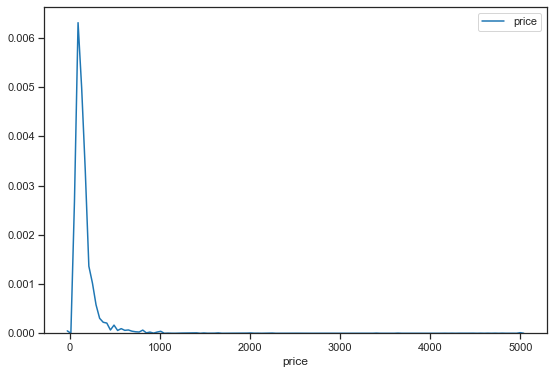

In [17]:
sns.distplot(data['price'], hist=False, label = 'price')

In [18]:
#for x in cont_predictors:
#    m = data[[x]]
#    plt.figure(x)
#    sns.distplot(m, hist=False, label = x)

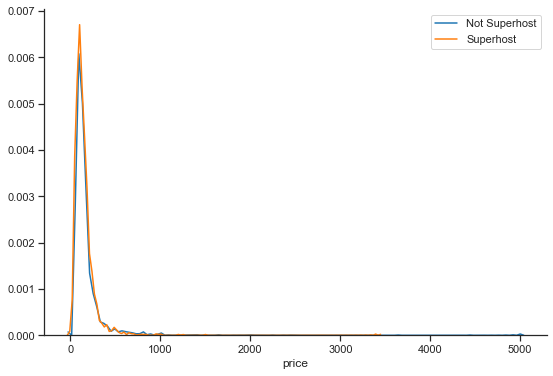

In [19]:
sns.distplot(data.loc[data['host_is_superhost']=='f','price'], hist=False, label='Not Superhost')
sns.distplot(data.loc[data['host_is_superhost']=='t','price'], hist=False, label='Superhost')
sns.despine()
plt.show()

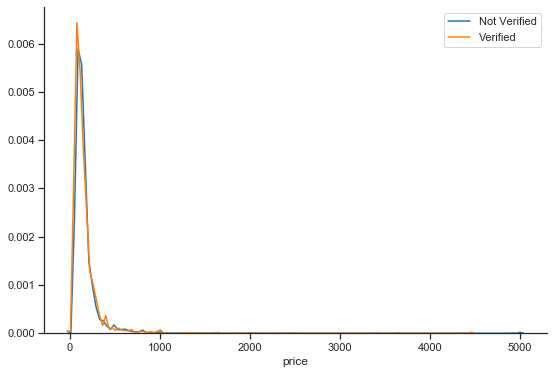

In [20]:
sns.distplot(data.loc[data['host_identity_verified']=='f','price'], hist=False, label='Not Verified')
sns.distplot(data.loc[data['host_identity_verified']=='t','price'], hist=False, label='Verified')
sns.despine()
plt.show()

In [21]:
#data['property_type'] = data['property_type'].astype('category')
#properties = (data['property_type'].cat.categories)
#for property in properties:
#    subset = data[data['property_type'] == property]    
#    sns.distplot(subset['price'], hist = False, label = property)

In [22]:
#data['room_type'] = data['room_type'].astype('category')
#types = (data['room_type'].cat.categories)
#for type in types:
#    subset = data[data['room_type'] == type]    
#    sns.distplot(subset['price'], hist = False, kde = True,
#                 kde_kws = {'linewidth': 3}, label = type)

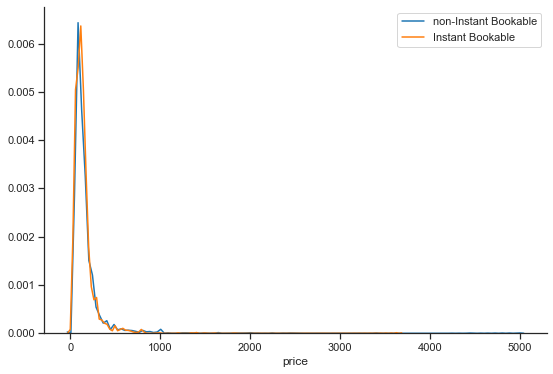

In [23]:
sns.distplot(data.loc[data['instant_bookable']=='f','price'], hist=False, label='non-Instant Bookable')
sns.distplot(data.loc[data['instant_bookable']=='t','price'], hist=False, label='Instant Bookable')
sns.despine()
plt.show()

In [24]:
#data['cancellation_policy'] = data['cancellation_policy'].astype('category')
#policies = (data['cancellation_policy'].cat.categories)
#for policy in policies:
#    subset = data[data['cancellation_policy'] == policy]    
#    sns.distplot(subset['price'], hist = False, kde = True,
#                 kde_kws = {'linewidth': 3}, label = policy)

In [25]:
#for x in cont_predictors:
#    graph = sns.regplot(data[[x]], data['price'], scatter_kws={'s': 30}, ci=None, label = x)
#    graph.legend(loc="best")
#    sns.despine()
#    plt.show()

In [26]:
#for x in cont_predictors:
#    sns.lmplot(x, 'price', data=data, hue='host_is_superhost')
#    plt.show()

In [27]:
#for x in cont_predictors:
#    sns.lmplot(x, 'price', data=data, hue='property_type')
#    plt.show()

In [28]:
#for x in cont_predictors:
#    sns.lmplot(x, 'price', data=data, hue='room_type')
#    plt.show()

In [29]:
#for x in cont_predictors:
#    sns.lmplot(x, 'price', data=data, hue='instant_bookable')
#    plt.show()

In [30]:
#for x in cont_predictors:
#    sns.lmplot(x, 'price', data=data, hue='cancellation_policy')
#    plt.show()

## 3. Data preparation

In this section we create dummy variables. As property types and room types don't seem to make much impact for the lodging prices based on the Exploratory Data Analysis, this variables were not included in the following consideration. In general, it could be seen from the exploratory data analysis, that the fact that the lodging is provided under the super strict cancellation policy has the impact on prices.

In [31]:
data['superhost'] = (data['host_is_superhost'] =='t').astype(int)
data['verified'] = (data['host_identity_verified'] =='t').astype(int)
data['instant'] = (data['instant_bookable'] =='t').astype(int)
data['strict'] = (data['cancellation_policy'] =='super_strict_60').astype(int)

In [32]:
data_test['superhost'] = (data_test['host_is_superhost'] =='t').astype(int)
data_test['verified'] = (data_test['host_identity_verified'] =='t').astype(int)
data_test['instant'] = (data_test['instant_bookable'] =='t').astype(int)
data_test['strict'] = (data_test['cancellation_policy'] =='super_strict_60').astype(int)

In [33]:
data.head()

,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,superhost,verified,instant,strict
id,,,,,,,,,,,,,,,,,,,,,
1,85,f,2,t,-37.81554,144.96526,Apartment,Private room,4,0.5,...,10.0,10.0,10.0,f,strict_14_with_grace_period,3.68,0,1,0,0
2,151,f,18,f,-37.91984,145.03395,Apartment,Entire home/apt,6,2.0,...,10.0,10.0,10.0,t,moderate,0.82,0,0,1,0
3,188,f,1,t,-37.64818,145.54512,Guesthouse,Entire home/apt,6,1.0,...,10.0,10.0,9.0,t,strict_14_with_grace_period,5.50,0,1,1,0
4,200,f,1,t,-37.80245,144.98457,Apartment,Entire home/apt,4,2.5,...,10.0,10.0,10.0,t,flexible,0.26,0,1,1,0
5,90,t,2,f,-37.81796,144.96541,Apartment,Entire home/apt,2,1.0,...,10.0,10.0,10.0,t,strict_14_with_grace_period,8.06,1,0,1,0


### 3.1. Training and test sets

In [34]:
from sklearn.model_selection import train_test_split

# Randomly split indexes
index_train, index_test  = train_test_split(np.array(data.index), train_size=0.7, random_state=10)

# Write training and test sets 
train = data.loc[index_train,:].copy()
test = data.loc[index_test,:].copy()   #the copy here is for technical reasons

train.head()

,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,superhost,verified,instant,strict
id,,,,,,,,,,,,,,,,,,,,,
775,220,f,2,t,-37.80360,144.98436,Apartment,Entire home/apt,6,2.0,...,10.0,10.0,8.0,f,flexible,0.03,0,1,0,0
6240,109,f,1,t,-37.87081,144.97754,Apartment,Entire home/apt,2,1.0,...,9.0,10.0,10.0,f,strict_14_with_grace_period,2.93,0,1,0,0
1919,165,t,3,f,-37.85187,145.36323,Bed and breakfast,Private room,2,1.0,...,10.0,10.0,10.0,f,strict_14_with_grace_period,0.56,1,0,0,0
545,54,t,4,t,-37.90865,145.12739,House,Private room,2,1.0,...,9.0,10.0,9.0,f,strict_14_with_grace_period,0.61,1,1,0,0
1949,129,t,12,f,-37.88155,144.98244,Apartment,Entire home/apt,2,1.0,...,10.0,10.0,9.0,f,strict_14_with_grace_period,1.52,1,0,0,0


### 3.2. Missing values

As it could be seen from the missing values' analysis, missing values in review scores coincide by different categories. It could be assumed, that the most missing values originated from the absense of information about guests' experience. So, the reason for missings is that the lodging haven't yet got any reviews. Based on this conclusion, all missing values in predictor variables were replaced by zeros indicating that they have no influence on price yet.
This replacement only is applicable with the assumption that review scores indicates specifically guests' reviews, not the lodging characteristics themselves.

In [35]:
data.isnull().sum()

price                             0
host_is_superhost                 0
host_total_listings_count         0
host_identity_verified            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         7
bedrooms                          1
beds                              3
security_deposit               1917
cleaning_fee                   1391
extra_people                      0
minimum_nights                    0
maximum_nights                    0
number_of_reviews                 0
review_scores_rating           1348
review_scores_accuracy         1356
review_scores_cleanliness      1352
review_scores_checkin          1359
review_scores_communication    1354
review_scores_location         1358
review_scores_value            1360
instant_bookable                  0
cancellation_policy               0
reviews_per_month           

In [36]:
train = train.fillna(0)
test = test.fillna(0)
data_test = data_test.fillna(0)
data = data.fillna(0)

### 3.3. Data transformation

As during Exploratory Data Analysis the price's distribution reveated to be right skewed, the logarithmic transformation to the price was applied.

In [37]:
y_train = np.log(train['price'])
y_test = np.log(test['price'])
y_data = np.log(data['price'])

## 4. Ridge regression model

To select the best number of regressors, the predictors were scaled.

In [38]:
predictors = ['superhost',
              'host_total_listings_count',
              'verified',
              'latitude',
              'longitude',
              'accommodates',
              'bathrooms',
              'bedrooms',
              'beds',
              'security_deposit',
              'cleaning_fee',
              'extra_people',
              'minimum_nights',
              'maximum_nights',
              'number_of_reviews',
              'review_scores_rating',
              'review_scores_accuracy',
              'review_scores_cleanliness',
              'review_scores_checkin',
              'review_scores_communication',
              'review_scores_location',
              'review_scores_value',
              'instant',
              'strict',
              'reviews_per_month']

X_train = train[predictors]
X_test = test[predictors]
X_data_test = data_test[predictors]
X_data = data[predictors]

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
print(y_pred_ridge[0])

4.763623971107297


In [41]:
from sklearn.pipeline import Pipeline

ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', Ridge()),
])

ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print(y_pred_ridge[0]) 

4.763623971107297


### 4.1. Cross Validation

In [42]:
from sklearn.linear_model import RidgeCV

alphas = list(np.logspace(-15, 15, 151, base=2))

ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([3.05175781e-05, 3.50554918e-05, 4.02681858e-05, 4.62559987e-05,
       5.31341897e-05, 6.10351562e-05, 7.01109836e-05, 8.05363715e-05,
       9.25119975e-05, 1.06268379e-04, 1.22070312e-04, 1.40221967e-04,
       1.61072743e-04, 1.85023995e-04, 2.12536759e-04, 2.44140625e-04,
       2.80443934e-04, 3.22145486e-04, 3.70047990e-04, 4.25073517e-04,
       4.88281250e-04, 5.60887869e-0...
       2.70235220e+03, 3.10418753e+03, 3.56577511e+03, 4.09600000e+03,
       4.70506846e+03, 5.40470440e+03, 6.20837506e+03, 7.13155021e+03,
       8.19200000e+03, 9.41013692e+03, 1.08094088e+04, 1.24167501e+04,
       1.42631004e+04, 1.63840000e+04, 1.88202738e+04, 2.16188176e+04,
       2.48335002e+04, 2.85262009e+04, 3.27680000e+04]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [43]:
from sklearn.pipeline import Pipeline

ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', RidgeCV(alphas=alphas, cv=5)),
])

ridge.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 RidgeCV(alphas=array([3.05175781e-05, 3.50554918e-05, 4.02681858e-05, 4.62559987e-05,
       5.31341897e-05, 6.10351562e-05, 7.01109836e-05, 8.05363715e-05,
       9.25119975e-05, 1.06268379e-04, 1.22070312e-04, 1.40221967e-04,
       1.61072743e-04, 1.85023995e-04, 2.12536759e...
       2.70235220e+03, 3.10418753e+03, 3.56577511e+03, 4.09600000e+03,
       4.70506846e+03, 5.40470440e+03, 6.20837506e+03, 7.13155021e+03,
       8.19200000e+03, 9.41013692e+03, 1.08094088e+04, 1.24167501e+04,
       1.42631004e+04, 1.63840000e+04, 1.88202738e+04, 2.16188176e+04,
       2.48335002e+04, 2.85262009e+04, 3.27680000e+04]),
                         cv=5, fit_intercept=True, gcv_mode=None,
                         normalize=False, scoring=None,
                         store_cv_values=False))],
         verbose=False)

In [44]:
sorted(
    [(x, y) for x, y in zip(predictors, ridge._final_estimator.coef_)],
    key=lambda x: -abs(x[1])
)[:20]

[('accommodates', 0.3354515343777637),
 ('review_scores_location', 0.30539045326525777),
 ('review_scores_value', -0.3050597573688461),
 ('review_scores_checkin', -0.2130992014998147),
 ('review_scores_cleanliness', 0.1812667660758611),
 ('bedrooms', 0.12258058662269862),
 ('review_scores_communication', -0.1119099233762563),
 ('beds', -0.10587436901032295),
 ('cleaning_fee', 0.0940969733444971),
 ('review_scores_rating', 0.09389977998110569),
 ('security_deposit', 0.05593947842443313),
 ('reviews_per_month', -0.04439151058704919),
 ('longitude', 0.04166302737460698),
 ('superhost', 0.031108363871332072),
 ('host_total_listings_count', 0.028653599841893532),
 ('review_scores_accuracy', 0.022301738415895785),
 ('number_of_reviews', 0.01955555654279073),
 ('bathrooms', 0.018417072401168643),
 ('verified', 0.016950970422042855),
 ('latitude', 0.015570883891696195)]

## 5. Lasso regression model

In [45]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
print(y_pred_lasso[0]) 

4.7540674829924


In [46]:
from sklearn.pipeline import Pipeline

lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', Lasso()),
])

lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print(y_pred_lasso[0]) 

4.7540674829924


### 5.1. Cross Validation

In [47]:
from sklearn.linear_model import LassoCV

alphas = list(np.logspace(-15, 15, 151, base=2))

lasso = LassoCV(alphas=alphas, cv=5)
lasso.fit(X_train_scaled, y_train)

LassoCV(alphas=[3.0517578125e-05, 3.505549179068098e-05, 4.026818575356734e-05,
                4.625599873383782e-05, 5.313418965430448e-05, 6.103515625e-05,
                7.011098358136196e-05, 8.053637150713468e-05,
                9.251199746767564e-05, 0.00010626837930860896, 0.0001220703125,
                0.00014022196716272393, 0.00016107274301426937,
                0.0001850239949353513, 0.0002125367586172179, 0.000244140625,
                0.0...
                0.0005608878686508957, 0.0006442909720570775,
                0.000740095979741406, 0.0008501470344688716, 0.0009765625,
                0.0011217757373017914, 0.001288581944114155,
                0.001480191959482812, 0.0017002940689377433, ...],
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [48]:
from sklearn.pipeline import Pipeline

lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', LassoCV(alphas=alphas, cv=5)),
])

lasso.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 LassoCV(alphas=[3.0517578125e-05, 3.505549179068098e-05,
                                 4.026818575356734e-05, 4.625599873383782e-05,
                                 5.313418965430448e-05, 6.103515625e-05,
                                 7.011098358136196e-05, 8.053637150713468e-05,
                                 9.251199746767564e-05, 0.00010626837930860896,
                                 0.0001220703125, 0...
                                 0.0006442909720570775, 0.000740095979741406,
                                 0.0008501470344688716, 0.0009765625,
                                 0.0011217757373017914, 0.001288581944114155,
                                 0.001480191959482812, 0.0017002940689377433, ...],
                         copy_X=True, cv=5, eps=0.001, fit_intercept=True,
                    

In [49]:
sorted(
    [(x, y) for x, y in zip(predictors, lasso._final_estimator.coef_)],
    key=lambda x: -abs(x[1])
)[:20]

[('accommodates', 0.3343666949301685),
 ('review_scores_value', -0.2849773112013642),
 ('review_scores_location', 0.2829247007608407),
 ('review_scores_checkin', -0.20400249114563673),
 ('review_scores_cleanliness', 0.1835161753618231),
 ('bedrooms', 0.12113020079177507),
 ('beds', -0.1027362179163672),
 ('cleaning_fee', 0.09441547922969913),
 ('review_scores_communication', -0.06984991852223146),
 ('review_scores_rating', 0.06493127133012008),
 ('security_deposit', 0.055679934134475084),
 ('reviews_per_month', -0.04210289030643033),
 ('longitude', 0.04113671636840115),
 ('superhost', 0.030711702380111113),
 ('host_total_listings_count', 0.028414763110310295),
 ('bathrooms', 0.017777489140276638),
 ('number_of_reviews', 0.017711918219513734),
 ('verified', 0.01651008104404142),
 ('latitude', 0.01517458543651596),
 ('instant', -0.013713503740178004)]

## 6. Elastic Net regression model

In [50]:
from sklearn.linear_model import ElasticNetCV

enet = ElasticNetCV(l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99], cv=5)
enet.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99],
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [51]:
enet.l1_ratio_

0.99

In [52]:
enet = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99], cv=5, n_alphas=200)),
])

enet.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001,
                              fit_intercept=True,
                              l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                        0.8, 0.9, 0.99],
                              max_iter=1000, n_alphas=200, n_jobs=None,
                              normalize=False, positive=False,
                              precompute='auto', random_state=None,
                              selection='cyclic', tol=0.0001, verbose=0))],
         verbose=False)

In [53]:
sorted(
    [(x, y) for x, y in zip(predictors, enet._final_estimator.coef_)],
    key=lambda x: -abs(x[1])
)[:20]

[('accommodates', 0.33434744546702416),
 ('review_scores_value', -0.28473152551135134),
 ('review_scores_location', 0.28261961277194764),
 ('review_scores_checkin', -0.2038451433575665),
 ('review_scores_cleanliness', 0.18344339348182614),
 ('bedrooms', 0.12112345967755178),
 ('beds', -0.10271032899180424),
 ('cleaning_fee', 0.09442054737017898),
 ('review_scores_communication', -0.0697036582963796),
 ('review_scores_rating', 0.06475721456868033),
 ('security_deposit', 0.05567904346347301),
 ('reviews_per_month', -0.04209054938618483),
 ('longitude', 0.041135235079788744),
 ('superhost', 0.030708133185590077),
 ('host_total_listings_count', 0.02841905868289255),
 ('bathrooms', 0.017775582892042587),
 ('number_of_reviews', 0.017705330607393356),
 ('verified', 0.016508220767205074),
 ('latitude', 0.015174556988476),
 ('instant', -0.013710528505546772)]

## 7. Model selection

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

columns = ['Test RMSE', 'Test R2']
rows = ['Ridge', 'Lasso', 'Elastic Net']
results = pd.DataFrame(0.0, columns=columns, index=rows) 

methods = [ridge, lasso, enet]

for i, method in enumerate(methods):
    y_pred = method.predict(X_test)
    results.iloc[i,0] = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))
    results.iloc[i,1] = r2_score(np.exp(y_test), np.exp(y_pred))

results.round(3)

,Test RMSE,Test R2
Ridge,143.725,0.398
Lasso,143.511,0.400
Elastic Net,143.507,0.400


Based on Model Selection Elastic Net model produced better results in comparison with Ridge and Lasso models.

## 8. Price forecast

In [55]:
enet_model = enet.fit(X_data, y_data)

In [56]:
y_pred = np.exp(enet_model.predict(X_data_test))
y_pred = pd.Series(y_pred)

In [57]:
submission = pd.DataFrame(y_pred, columns = ['Predicted'])
submission['Id'] = submission.index

In [58]:
y_pred.loc[555] = 0
y_pred.loc[556] = 9999
y_pred.loc[747] = 0
y_pred.loc[1009] = 9999
y_pred.loc[1287] = 9999
y_pred.loc[1627] = 0 
y_pred.loc[1950] = 0
y_pred.loc[1960] = 9999
y_pred.loc[2113] = 9999
y_pred.loc[2475] = 9999
y_pred.loc[3563] = 9999
y_pred.loc[4047] = 0
y_pred.loc[4318] = 9999
y_pred.loc[5357] = 9999
y_pred.loc[5449] = 12624
y_pred.loc[5925] = 0
y_pred.loc[6105] = 0
y_pred.loc[6227] = 9999
y_pred.loc[6540] = 9999

In [59]:
submission = pd.DataFrame(y_pred, columns = ['Predicted'])
submission['Id'] = submission.index + 1
submission = submission[['Id','Predicted']]
submission.to_csv('Submissions/enet_submission.csv', index=False)

In [60]:
submission.shape

(7000, 2)

In [61]:
submission.head()

,Id,Predicted
0,1,88.523803
1,2,236.635664
2,3,115.996084
3,4,88.811707
4,5,380.887533
